## Name - Vaibhav R. Gudulkar

# Assignment - Neural Network (forestfire.csv)

#### PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [2]:
# importing the reequired libraries

import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV, KFold

In [4]:
forestfire = pd.read_csv('forestfires.csv')

forestfire.sample(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
254,aug,thu,91.6,138.1,621.7,6.3,18.9,41,3.1,0.0,...,0,0,0,0,0,0,0,0,0,large
50,sep,thu,92.9,137.0,706.4,9.2,20.8,17,1.3,0.0,...,0,0,0,0,0,0,0,0,1,small
138,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,...,0,0,1,0,0,0,0,0,0,small
89,mar,sat,91.7,35.8,80.8,7.8,17.4,25,4.9,0.0,...,0,0,0,0,1,0,0,0,0,small
312,sep,sun,50.4,46.2,706.6,0.4,12.2,78,6.3,0.0,...,0,0,0,0,0,0,0,0,1,small


In [5]:
# Performing Basic EDA

forestfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [9]:
forestfire.shape

(517, 31)

In [7]:
forestfire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='size_category', ylabel='count'>

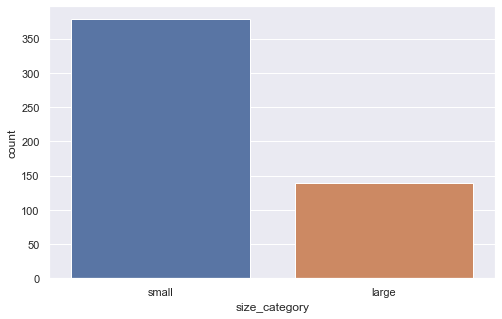

In [18]:
# Visualisation

import seaborn as sns

sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x=forestfire['size_category'])

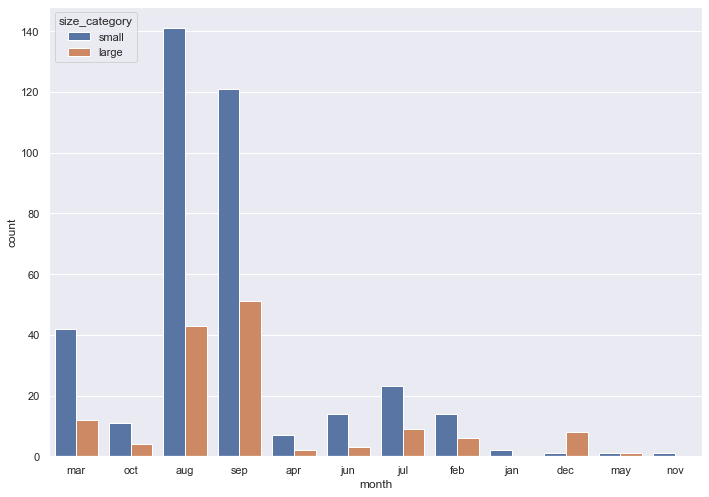

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(x=forestfire['month'],hue=data['size_category']);

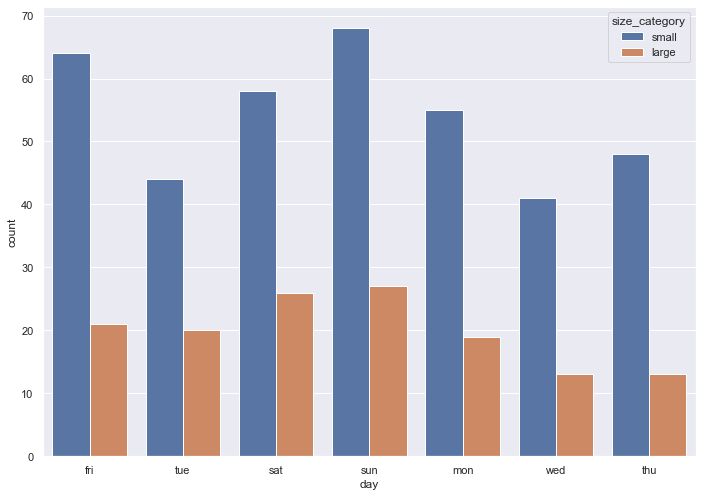

In [21]:
sns.countplot(x=forestfire['day'],hue=data['size_category']);

C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


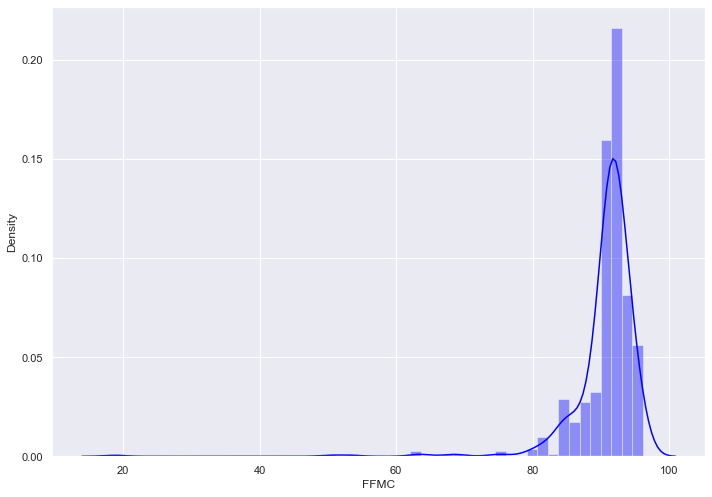

In [37]:
sns.distplot(x=forestfire['FFMC'],axlabel='FFMC', color='blue');

C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


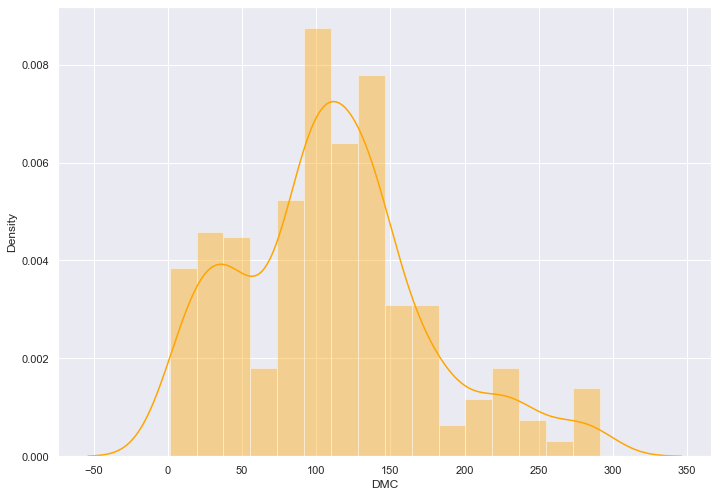

In [25]:
sns.distplot(x=forestfire['DMC'],axlabel='DMC', color='orange');

C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


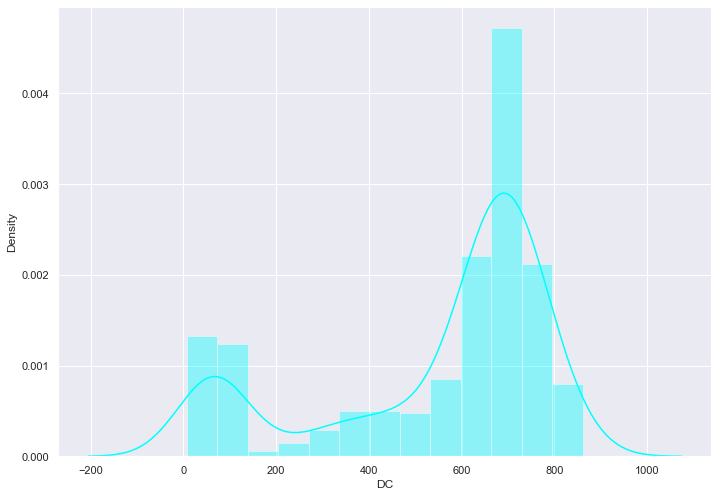

In [26]:
sns.distplot(x=forestfire['DC'],axlabel='DC',color='cyan');

C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


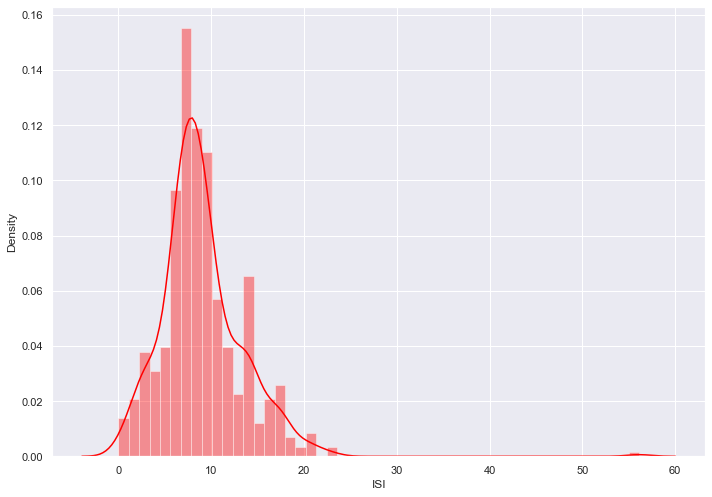

In [30]:
sns.distplot(x=forestfire['ISI'],axlabel='ISI',color='red');

C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


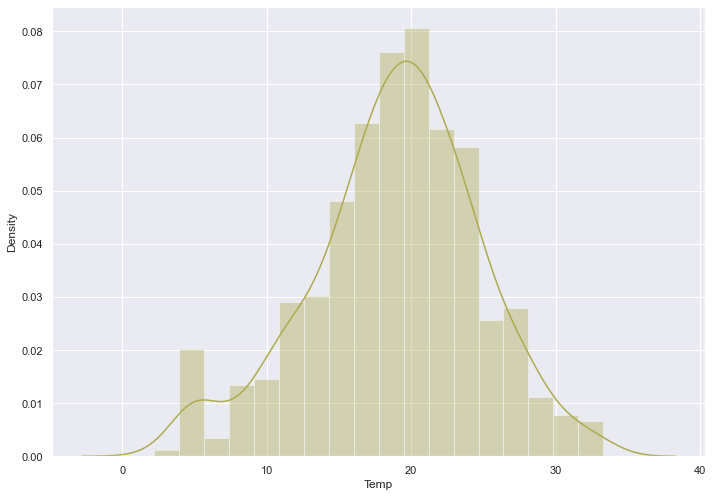

In [31]:
sns.distplot(x=forestfire['temp'],axlabel='Temp',color='#adab4d');

C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


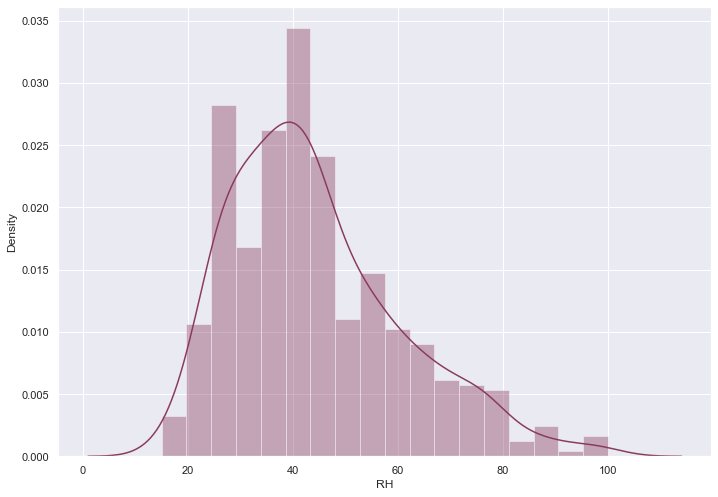

In [35]:
sns.distplot(x=forestfire['RH'],axlabel='RH',color='#8a3b5d');

C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


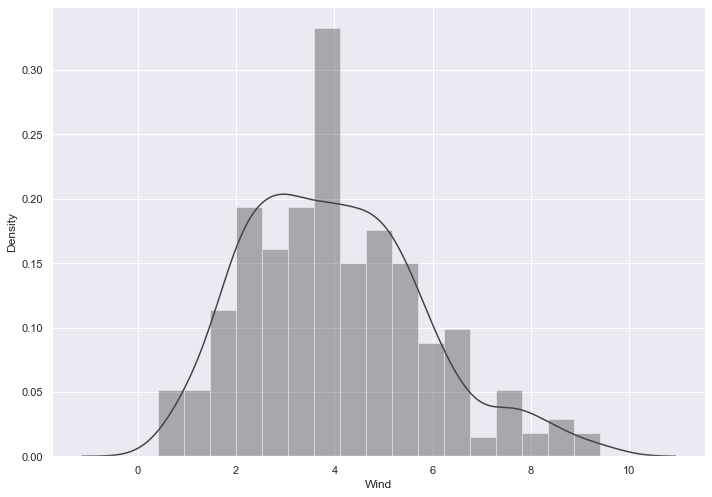

In [36]:
sns.distplot(x=forestfire['wind'],axlabel='Wind',color='#444444');

C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


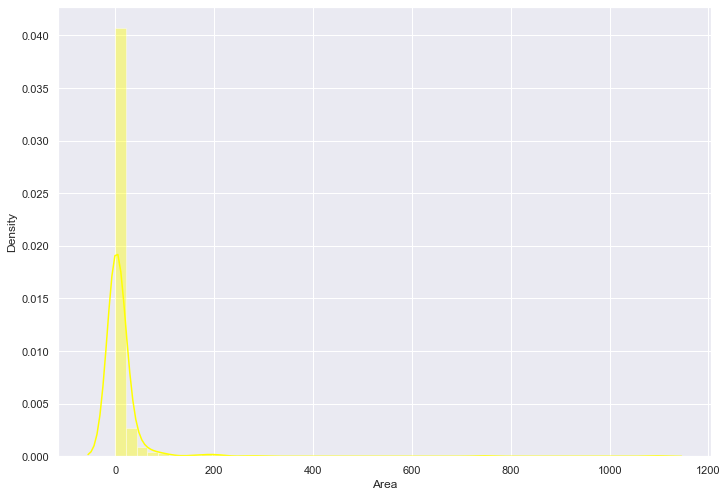

In [38]:
sns.distplot(x=forestfire['area'],axlabel='Area',color='yellow');

In [39]:
fire_1= forestfire.drop(['month','day'], axis=1)

In [40]:
fire_1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
label_encoder = LabelEncoder()
fire_1['size_category']= label_encoder.fit_transform(fire_1['size_category'])

In [43]:
fire_1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


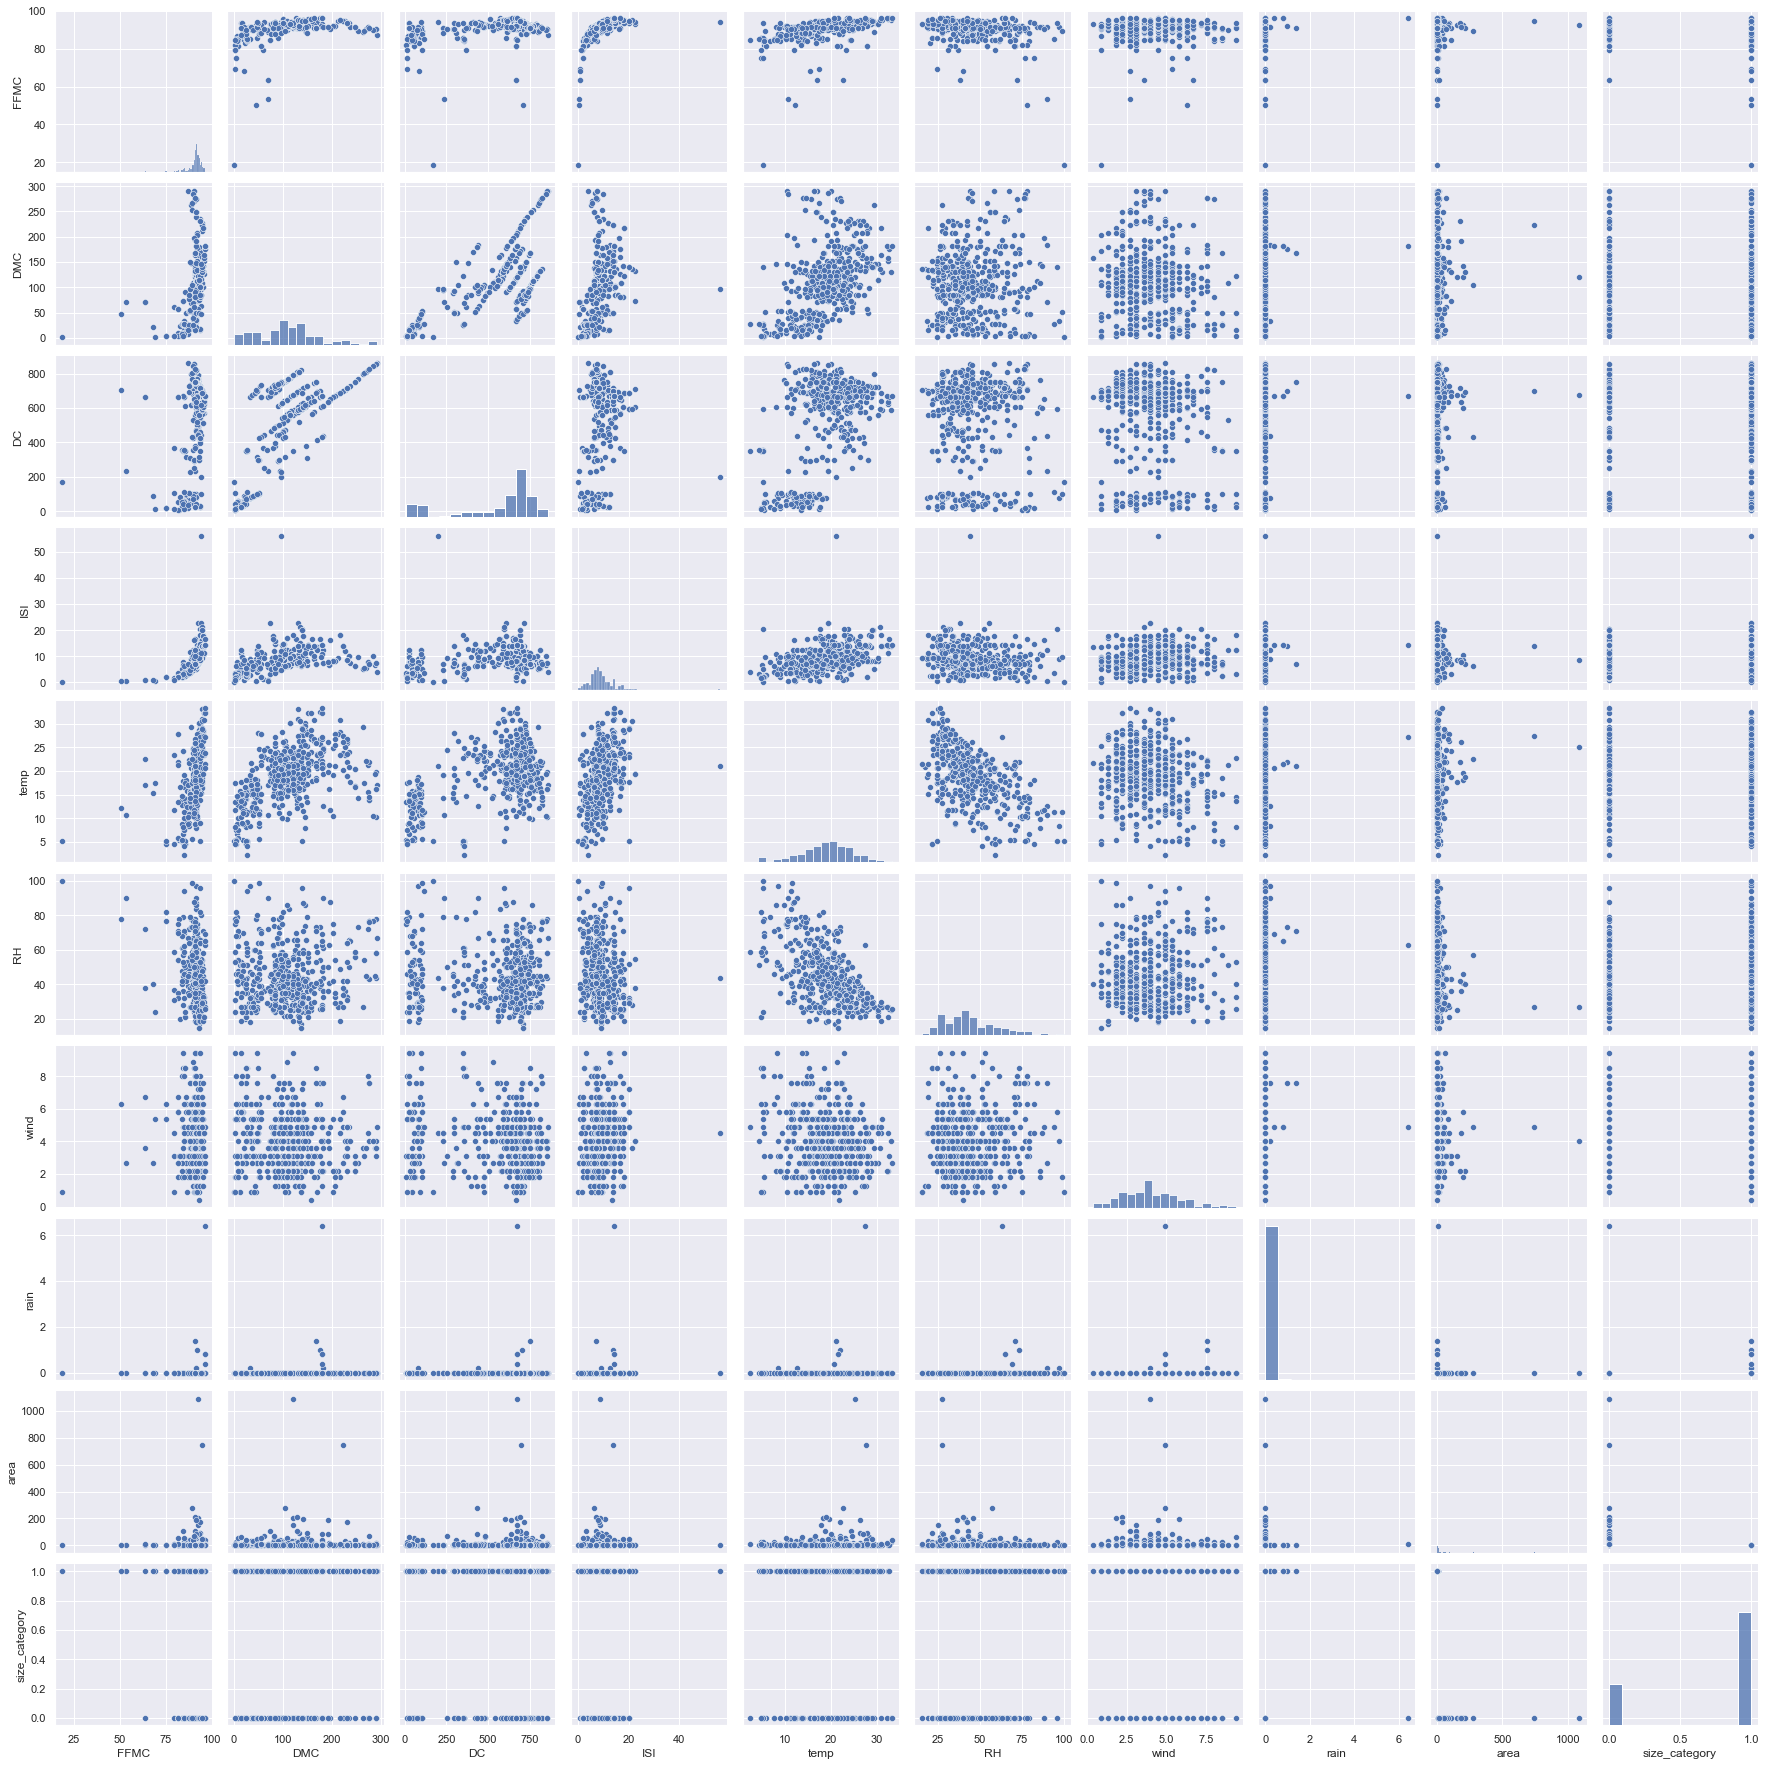

In [44]:
pairplot_df= pd.concat([fire_1.iloc[:,0:9], fire_1.iloc[:,-1]], axis=1)
sns.pairplot(pairplot_df)

In [46]:
X= fire_1.iloc[:,0:28]
Y= fire_1.iloc[:,28:]

In [47]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
Y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [49]:
scaler= StandardScaler()
scaler.fit(X)
X_standarized = scaler.transform(X)
X_standarized

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

### Model Building


In [51]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
from sklearn.metrics import accuracy_score

### Tuning of Hyperparameter : Batch size and Epoch

In [54]:
def create_model():
        model= Sequential()
        model.add(Dense(8,input_dim=28, kernel_initializer='uniform', activation='relu'))
        model.add(Dropout(0.01))
        model.add(Dense(4, kernel_initializer='uniform', activation='relu'))
        model.add(Dropout(0.1))
        model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
        adam= Adam(learning_rate=0.001)
        model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
        return model

model= KerasClassifier(build_fn=create_model, verbose=0)

batch_size= [10,30,50]
epochs = [10,20,30]
param_grid = dict( batch_size= batch_size, epochs= epochs)
gsv = GridSearchCV( estimator=model, param_grid=param_grid, cv=KFold(), verbose=5)
gsv_result = gsv.fit(X_standarized, Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\Vaibhav\AppData\Local\Temp/ipykernel_98728/1896407491.py:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model= KerasClassifier(build_fn=create_model, verbose=0)


[CV 1/5] END ..........batch_size=10, epochs=10;, score=1.000 total time=   2.5s
[CV 2/5] END ..........batch_size=10, epochs=10;, score=0.750 total time=   2.3s
[CV 3/5] END ..........batch_size=10, epochs=10;, score=0.524 total time=   2.4s
[CV 4/5] END ..........batch_size=10, epochs=10;, score=0.680 total time=   2.5s
[CV 5/5] END ..........batch_size=10, epochs=10;, score=0.728 total time=   2.6s
[CV 1/5] END ..........batch_size=10, epochs=20;, score=1.000 total time=   4.4s
[CV 2/5] END ..........batch_size=10, epochs=20;, score=0.750 total time=   3.4s
[CV 3/5] END ..........batch_size=10, epochs=20;, score=0.650 total time=   3.7s
[CV 4/5] END ..........batch_size=10, epochs=20;, score=0.699 total time=   3.2s
[CV 5/5] END ..........batch_size=10, epochs=20;, score=0.757 total time=   3.1s
[CV 1/5] END ..........batch_size=10, epochs=30;, score=0.990 total time=   3.9s
[CV 2/5] END ..........batch_size=10, epochs=30;, score=0.808 total time=   4.6s
[CV 3/5] END ..........batch

In [55]:
print(gsv_result.best_score_, gsv_result.best_params_)

0.852819275856018 {'batch_size': 10, 'epochs': 30}


### Tuning of Hyperparameter : Learning rate & Dropout rate

In [57]:
def create_model(learning_rate, dropout_rate):
        model= Sequential()
        model.add(Dense(8,input_dim=28, kernel_initializer='uniform', activation='relu'))
        model.add(Dropout(0.01))
        model.add(Dense(4, kernel_initializer='uniform', activation='relu'))
        model.add(Dropout(0.1))
        model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
        adam= Adam(learning_rate=learning_rate)
        model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
        return model

model= KerasClassifier(build_fn=create_model, batch_size=10, epochs=30, verbose=0)

learning_rate= [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
param_grid = dict( learning_rate=learning_rate, dropout_rate= dropout_rate)
gsv = GridSearchCV( estimator=model, param_grid=param_grid, cv=KFold(), verbose=5)
gsv_result = gsv.fit(X_standarized, Y)

C:\Users\Vaibhav\AppData\Local\Temp/ipykernel_98728/1846646618.py:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model= KerasClassifier(build_fn=create_model, batch_size=10, epochs=30, verbose=0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   4.5s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.001;, score=0.769 total time=   4.3s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.001;, score=0.699 total time=   4.2s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.001;, score=0.825 total time=   4.6s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.001;, score=0.786 total time=   4.3s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.01;, score=1.000 total time=   4.2s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.904 total time=   4.3s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.903 total time=   4.1s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.680 total time=   6.0s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.874 total time=   4.1s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.1;, score=1.000 total time=   4.3s
[CV 2/5] END dropout_ra

In [59]:
print(gsv_result.best_score_, gsv_result.best_params_)

0.9109409928321839 {'dropout_rate': 0.2, 'learning_rate': 0.01}


### Tuning of Hyperparameter :Activation Function & Kernel Initializer

In [62]:
def create_model(activation_function, init):
    
    model= Sequential()
    model.add(Dense(8,input_dim=28, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    adam= Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model= KerasClassifier(build_fn=create_model, batch_size=10, epochs=30, verbose=0)

activation_function= ['relu', 'tanh','softmax','linear']
init = ['zero', 'uniform','normal']
param_grid = dict( activation_function=activation_function, init= init)
gsv = GridSearchCV( estimator=model, param_grid=param_grid, cv=KFold(), verbose=5)
gsv_result = gsv.fit(X_standarized, Y)

C:\Users\Vaibhav\AppData\Local\Temp/ipykernel_98728/1640382624.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model= KerasClassifier(build_fn=create_model, batch_size=10, epochs=30, verbose=0)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END activation_function=relu, init=zero;, score=1.000 total time=   4.1s
[CV 2/5] END activation_function=relu, init=zero;, score=0.865 total time=   4.6s
[CV 3/5] END activation_function=relu, init=zero;, score=0.903 total time=   4.1s
[CV 4/5] END activation_function=relu, init=zero;, score=0.874 total time=   4.4s
[CV 5/5] END activation_function=relu, init=zero;, score=0.699 total time=   4.4s
[CV 1/5] END activation_function=relu, init=uniform;, score=1.000 total time=   4.5s
[CV 2/5] END activation_function=relu, init=uniform;, score=0.885 total time=   4.5s
[CV 3/5] END activation_function=relu, init=uniform;, score=0.893 total time=   4.1s
[CV 4/5] END activation_function=relu, init=uniform;, score=0.932 total time=   3.9s
[CV 5/5] END activation_function=relu, init=uniform;, score=0.893 total time=   4.0s
[CV 1/5] END activation_function=relu, init=normal;, score=1.000 total time=   4.2s
[CV 2/5] END activat

In [ ]:
print(gsv_result.best_score_, gsv_result.best_params_)

### Tuning of Hyperparameter :Number of Neurons in hidden layer

In [63]:

def create_model(neuron1, neuron2):
    
    model= Sequential()
    model.add(Dense(neuron1,input_dim=28, kernel_initializer='normal', activation='softmax'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2, kernel_initializer='normal', activation='softmax'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    adam= Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model= KerasClassifier(build_fn=create_model, batch_size=10, epochs=30, verbose=0)

neuron1= [24,16,8]
neuron2= [12,8,4]
param_grid = dict( neuron1=neuron1, neuron2= neuron2)
gsv = GridSearchCV( estimator=model, param_grid=param_grid, cv=KFold(), verbose=5)
gsv_result = gsv.fit(X_standarized, Y)

C:\Users\Vaibhav\AppData\Local\Temp/ipykernel_98728/4103414725.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model= KerasClassifier(build_fn=create_model, batch_size=10, epochs=30, verbose=0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ............neuron1=24, neuron2=12;, score=0.952 total time=   4.6s
[CV 2/5] END ............neuron1=24, neuron2=12;, score=0.817 total time=   5.3s
[CV 3/5] END ............neuron1=24, neuron2=12;, score=0.777 total time=   4.4s
[CV 4/5] END ............neuron1=24, neuron2=12;, score=0.806 total time=   4.8s
[CV 5/5] END ............neuron1=24, neuron2=12;, score=0.835 total time=   5.0s
[CV 1/5] END .............neuron1=24, neuron2=8;, score=0.990 total time=   4.9s
[CV 2/5] END .............neuron1=24, neuron2=8;, score=0.808 total time=   4.9s
[CV 3/5] END .............neuron1=24, neuron2=8;, score=0.796 total time=   4.7s
[CV 4/5] END .............neuron1=24, neuron2=8;, score=0.796 total time=   5.0s
[CV 5/5] END .............neuron1=24, neuron2=8;, score=0.835 total time=   4.3s
[CV 1/5] END .............neuron1=24, neuron2=4;, score=0.971 total time=   4.4s
[CV 2/5] END .............neuron1=24, neuron2=4;,

In [64]:
print(gsv_result.best_score_,gsv_result.best_params_)

means = gsv_result.cv_results_['mean_test_score']
stds = gsv_result.cv_results_['std_test_score']
params = gsv_result.cv_results_['params']

for mean, stdev, param in zip ( means, stds, params):
    print('{}, {} with: {}'.format( mean, stdev, param))

0.8993651986122131 {'neuron1': 8, 'neuron2': 4}
0.8373412966728211, 0.06034366378028058 with: {'neuron1': 24, 'neuron2': 12}
0.8450522899627686, 0.07403878025905207 with: {'neuron1': 24, 'neuron2': 8}
0.8450149416923523, 0.06765086512234776 with: {'neuron1': 24, 'neuron2': 4}
0.8683532476425171, 0.06712520268426804 with: {'neuron1': 16, 'neuron2': 12}
0.8566841125488281, 0.07439159870147881 with: {'neuron1': 16, 'neuron2': 8}
0.8528379321098327, 0.0642120830996725 with: {'neuron1': 16, 'neuron2': 4}
0.866374158859253, 0.06959569728544507 with: {'neuron1': 8, 'neuron2': 12}
0.8876400351524353, 0.04591555239118805 with: {'neuron1': 8, 'neuron2': 8}
0.8993651986122131, 0.05160155211821837 with: {'neuron1': 8, 'neuron2': 4}


### Training model with optimum values of Hyperparameters

In [67]:

def create_model():
    
    model= Sequential()
    model.add(Dense(8,input_dim=28, kernel_initializer='normal', activation='softmax'))
    model.add(Dropout(0.2))
    model.add(Dense(4, kernel_initializer='normal', activation='softmax'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    adam= Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model= KerasClassifier(build_fn=create_model, batch_size=10, epochs=30, verbose=0)
model.fit(X_standarized, Y)
y_predict = model.predict(X_standarized)

print('The Accuracy is :',accuracy_score(Y, y_predict))

C:\Users\Vaibhav\AppData\Local\Temp/ipykernel_98728/2934685783.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model= KerasClassifier(build_fn=create_model, batch_size=10, epochs=30, verbose=0)


The Accuracy is : 0.9787234042553191


#### Since due to coputational complexity hyper parameters are optimized two at a time.

### Below is the code for hyperparameter optimization all at once

In [ ]:
def create_model(learning_rate, dropout_rate,activation_function,init,neuron1, neuron2):
    model= Sequential()
    model.add(Dense(neuron1,input_dim=28, kernel_initializer=init, activation=activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2, kernel_initializer=init, activation=activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    adam= Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model= KerasClassifier(build_fn=create_model, batch_size=batch_size, epochs=epochs,learning_rate=learning_rate,
                       activation_function=activation_function,init=init,neuron1=neuron1,neuron2=neuron2)


batch_size= [10,30,50]
epochs = [10,20,30]
learning_rate= [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function= ['relu', 'tanh','softmax','linear']
init = ['zero', 'uniform','normal']
neuron1= [24,16,8]
neuron2= [12,8,4]

param_grid = dict( neuron1=neuron1, neuron2= neuron2)
gsv = GridSearchCV( estimator=model, param_grid=param_grid, cv=KFold(), verbose=5)
gsv_result = gsv.fit(X_standarized, Y)

In [68]:
print(gsv_result.best_score_,gsv_result.best_params_)

means = gsv_result.cv_results_['mean_test_score']
stds = gsv_result.cv_results_['std_test_score']
params = gsv_result.cv_results_['params']
for mean, stdev, param in zip ( means, stds, params):
    
    print('{},{} with:{}'.format( mean, stdev, param))

0.8993651986122131 {'neuron1': 8, 'neuron2': 4}
0.8373412966728211,0.06034366378028058 with:{'neuron1': 24, 'neuron2': 12}
0.8450522899627686,0.07403878025905207 with:{'neuron1': 24, 'neuron2': 8}
0.8450149416923523,0.06765086512234776 with:{'neuron1': 24, 'neuron2': 4}
0.8683532476425171,0.06712520268426804 with:{'neuron1': 16, 'neuron2': 12}
0.8566841125488281,0.07439159870147881 with:{'neuron1': 16, 'neuron2': 8}
0.8528379321098327,0.0642120830996725 with:{'neuron1': 16, 'neuron2': 4}
0.866374158859253,0.06959569728544507 with:{'neuron1': 8, 'neuron2': 12}
0.8876400351524353,0.04591555239118805 with:{'neuron1': 8, 'neuron2': 8}
0.8993651986122131,0.05160155211821837 with:{'neuron1': 8, 'neuron2': 4}
